# [**Generating WordClouds in Python Tutorial**](https://www.datacamp.com/tutorial/wordcloud-python)

Learn how to perform Exploratory Data Analysis for Natural Language Processing using WordCloud in Python.

Updated Feb 2023, Duong Vu.

**Disclosure**: This is not work of my property, used it for learning.

## What is a Word Cloud?

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a **Tag Cloud** or **word cloud**.

## When to Use a Word Cloud

It's important to remember that while word clouds are useful for visualizing common words in a text or data set, they're usually only useful as a high-level overview of themes. They're similar to bar plots but are often more visually appeling (albeit at times harder to interpret). Word clouds can be particularly helpful when you want to:

- Quickly identify the most **important themes** or **topics** in a alrge body of text
- Understand the **overall sentiment** or tone of a piece of writing
- Explore **patterns** or **trends** in data that contain textual information
- Communicate the **key ideas** or **concepts** in a visually engaging way

## Dataset

This tutorial uses the [**wine review dataset**](https://www.kaggle.com/zynicide/wine-reviews/data) from Kaggle. This collection is a great dataset for learning with no missing values (which will take time to handle) and a lot of text (wine reviews), categorical, and numerical data.

## **Creating a Word Cloud in Python: Preparation**

In [3]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### **Load the data into the dataframe**

In [5]:
# Load in the dataframe
df = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


You can printout some basic information about the dataset using `print()` combined with `.format()` to have a nice printout.

In [14]:
print(f"There are {df.shape[0]:,} observations and {df.shape[1]} features in this dataset.")
print(f"There are {df.variety.unique().size} types of wine in this dataset such as {', '.join(df.variety.unique()[:5])}...")
print(f"There are {df.country.unique().size} countries producing wine in this dataset such as {', '.join(df.country.unique()[:5])}...")

There are 129,971 observations and 13 features in this dataset.
There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir...
There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France...


In [15]:
df[['country', 'description', 'points']].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


### **Create groups to compare features**

To make comparisons between groups of a feature, you can use `groupby()` and compute summary statistics.

With the wine dataset, you can group by country and look at either the summary statistic for all countries' points and price or select the most popular and expensive ones.

In [16]:
# Groupby by country
country = df.groupby('country')

# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

This selects the top 5 highes average points among all 44 countries:

In [18]:
country.mean().sort_values(by='points', ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


### **Plot the data**

You can plot the number of wines by country using the plot method of Pandas DataFrame and Matplotlib.

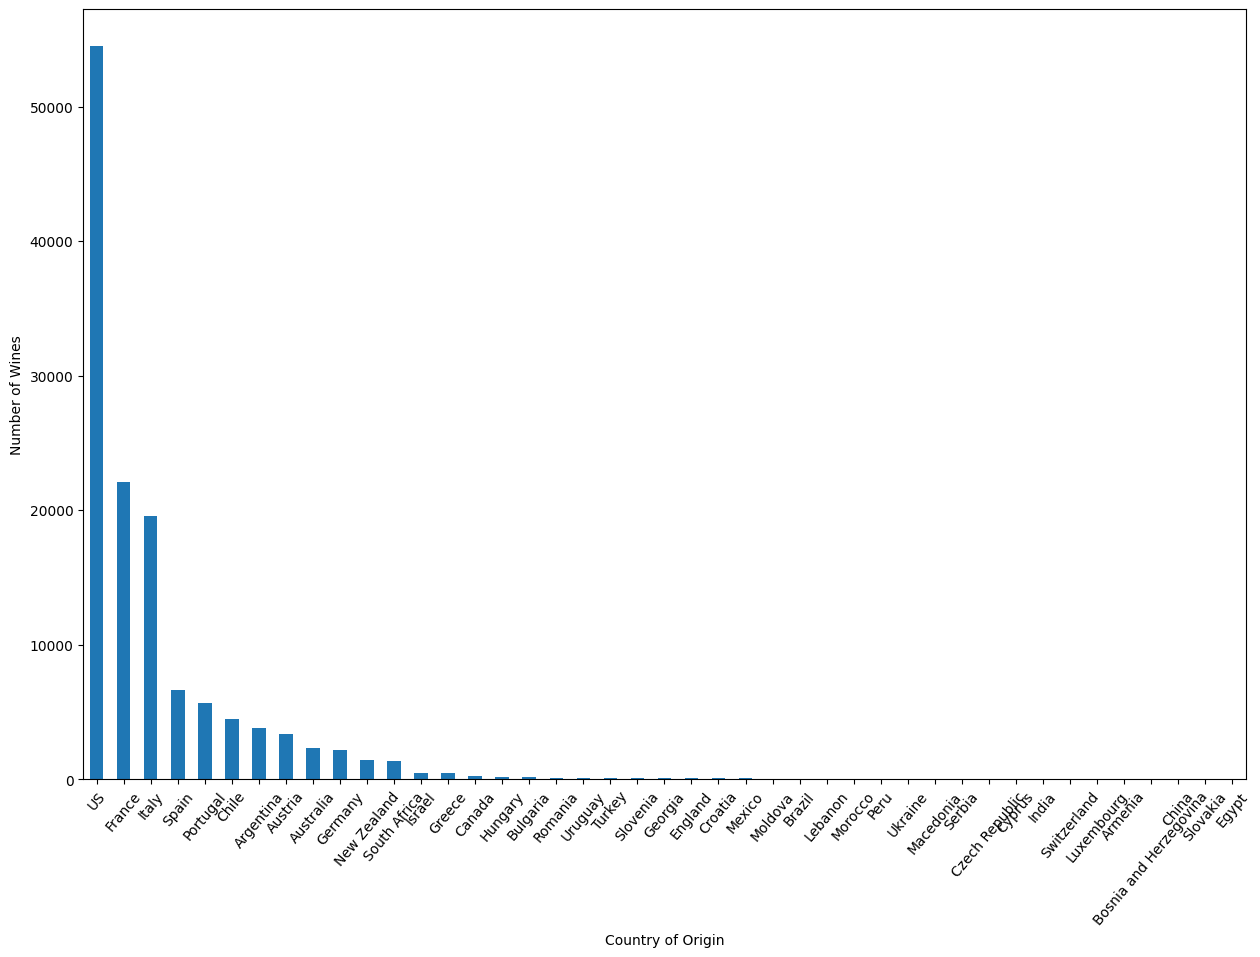

In [24]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

### **Examine the data**

Let's now take a look at the plot of all 44 countries by its highes-rated wine, using hte same plotting technique as above.

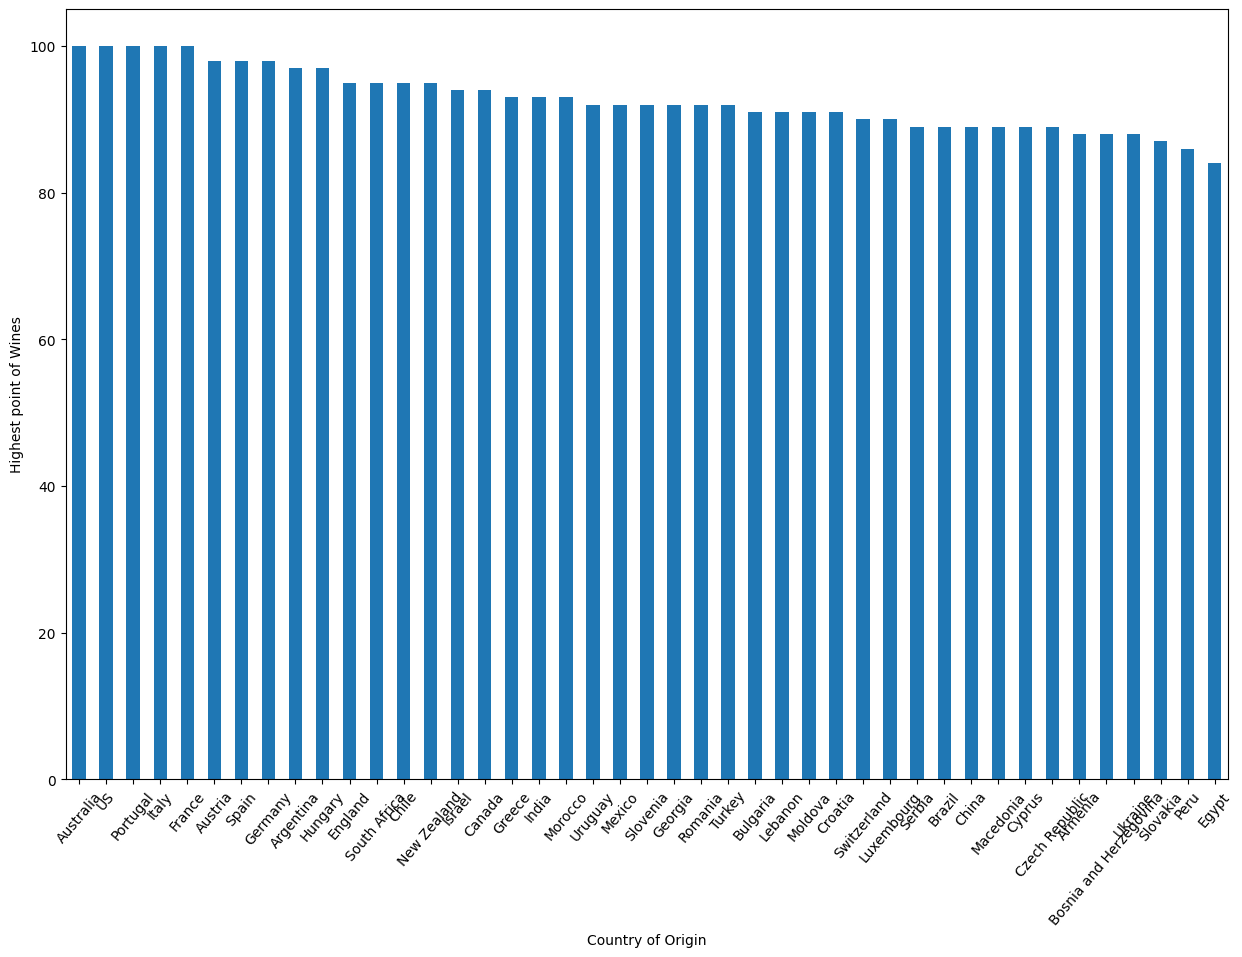

In [28]:
plt.figure(figsize=(15,10))
country.points.max().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

## **Setting up a Basic Word CLoud in Python**

### **Getting Started**

A **word cloud** is a technique to show which words are the most frequent in the given text.

`?WordCloud`

### **Start with a simple input**

So let's start with a simple example: using the first observation description as the input for the word cloud. The three steps are:
- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.


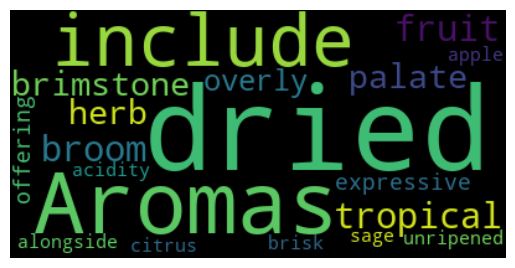

In [35]:
# Start with one review
text = df.description[0]
print(text)

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Changing optional word cloud arguments**

Now, change some optional arguments of the word cloud like `max_font_size`, `max_word`, and `background_color`.

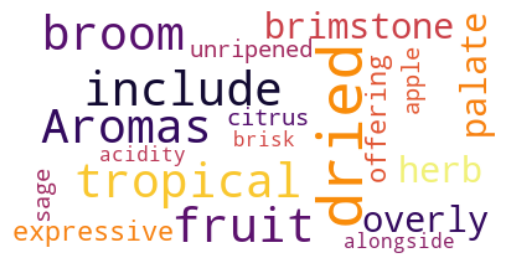

In [41]:
# lower max_font_size, change the maximum number of words and lighten the background
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white', colormap='inferno').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
# Save the wordcloud image in the img folder
wordcloud.to_file('img/first_review.png')

**CONTINUE**